# Section 1: Why Jupyter Notebooks? Why pandas?

Jupyter Notebooks give us the ability to execute code in a particular cell as opposed to running the entire file. This saves a lot of time when working with large datasets and complex transformations. Notebooks also provide an easy way to visualize pandas’ DataFrames and plots. 


Our lecture0 will begin by introducing the `Series`, `DataFrame`, and `Index` classes, which are the basic building blocks of the pandas library. By the end of this section, you will be able to create DataFrames and perform operations on them to inspect and filter the data.

Why Pandas? 
It is an open-source library written in Python Language. Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages and can import data from various file formats like JSON, SQL, Microsoft Excel, etc.

## Pandas First Steps

#### Install and import

Pandas is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

    conda install pandas

OR

    pip install pandas

Alternatively, if you're currently viewing this article in a Jupyter notebook you can run this cell:

    !pip install pandas

To import pandas we usually import it with a shorter name since it's used so much (also known as aliasing):

    import pandas as pd


### Exercises by the end of Lecture 0

1. Install pandas on your machine (using Anaconda or pip)
2. Install Jupyter on your machine
3. Launch Jupyter and run the following in a cell
        import pandas
        pandas.show_versions()

## Core components of pandas: Series and DataFrames

Understanding the data model is the key to using Pandas. At the core pandas are two data structures: Series and DataFrame. A DataFrame is composed of one or more Series. The names of the Series form the column names, and the row labels form the Index.

                			
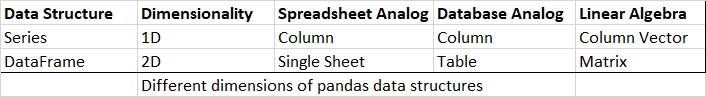


<div>
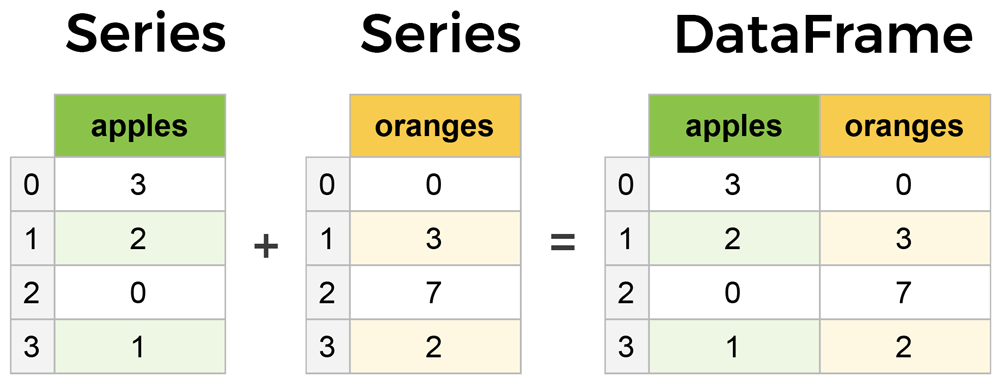
</div>

### Questions

1. If you had a spreadsheet with data, which pandas data structure would you use to hold the data? Why?
2. If you had a database with data, which pandas data structure would you use to hold the data? Why?

## Series Deep Dive

In [6]:
import pandas as pd

help(pd.Series)
help(pd)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged ::

In [17]:
#index can be integer-based
df = pd.Series([5, 2, 8, 4, 2, 4], name = 'SF Weekly Ticket Count')
df

#df.index

RangeIndex(start=0, stop=6, step=1)

In [16]:
#index can be string based
df2 = pd.Series([5, 2, 8, 4, 2, 4], index=['Leo', 'Bilge', 'Lin', 'Nathan', 'Reddy', 'Yang'], name = 'SF Weekly Ticket Count')
df2

# How many columns in this series?
# The leftmost column is the index


# What can be the datatype for the values in series?


# What is the datatype of the index in this series?

Index(['Leo', 'Bilge', 'Lin', 'Nathan', 'Reddy', 'Yang'], dtype='object')


### The NaN value

In [19]:
import numpy as np
nan_series = pd.Series([2, np.nan],
   index=['La Jolla', 'Pacific Beach'])
nan_series

La Jolla         2.0
Pacific Beach    NaN
dtype: float64

In [20]:
#with the .count method, the NaN will be ignored by pandas, so it is misleading
nan_series.count()

1

In [21]:
# Let's inspect the number of entries (including missing values) with the .size property
nan_series.size

2

## Anatomy of a DataFrame

A **DataFrame** is composed of one or more **Series**. The names of the **Series** form the column names, and the row labels form the **Index**.

In [1]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv', nrows=5)
meteorites

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


*Source: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

#### Series:

In [2]:
meteorites.name

0      Aachen
1      Aarhus
2        Abee
3    Acapulco
4     Achiras
Name: name, dtype: object

#### Columns:

In [3]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### Index:

In [4]:
meteorites.index

RangeIndex(start=0, stop=5, step=1)

## Creating DataFrames

We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests. Here, we will see just a couple of examples, but be sure to check out [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the documentation for a complete list.

### Using a flat file

In [5]:
import pandas as pd

meteorites = pd.read_csv('../data/Meteorite_Landings.csv')

*Tip: There are many parameters to this function to handle some initial processing while reading in the file &ndash; be sure check out the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).*

### Using data from an API

Collect the data from [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) using the Socrata Open Data API (SODA) with the `requests` library:

In [6]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

Create the DataFrame with the resulting payload:

In [7]:
import pandas as pd

df = pd.DataFrame(payload)
df.head(3)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'latitude': '54.21667', 'longitude': '-113.0'}",NaN,NaN


*Tip: `df.to_csv('data.csv')` writes this data to a new file called `data.csv`.*

## Inspecting the data
Now that we have some data, we need to perform an initial inspection of it. This gives us information on what the data looks like, how many rows/columns there are, and how much data we have. 

Let's inspect the `meteorites` data.

#### How many rows and columns are there?

In [8]:
meteorites.shape

(45716, 10)

#### What are the column names?

In [9]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

#### What type of data does each column currently hold?

In [10]:
meteorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

#### What does the data look like?

In [11]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Sometimes there may be extraneous data at the end of the file, so checking the bottom few rows is also important:

In [12]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


#### Get some information about the DataFrame

In [13]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


### [Exercise 1.1](./workbook.ipynb#Exercise-1.1)

##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [14]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 1.1` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

### [Exercise 1.2](./workbook.ipynb#Exercise-1.2)

##### Find the dimensions (number of rows and number of columns) in the data.

In [15]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 1.2` above to open the workbook.ipynb file

# WARNING: if you complete the exercise here, your cell numbers
# for the rest of the training might not match the slides

## Extracting subsets

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [16]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [17]:
meteorites[['name', 'mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


#### Selecting rows

In [18]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


#### Indexing

We use `iloc[]` to select rows and columns by their position:

In [19]:
meteorites.iloc[100:104, [0, 3, 4, 6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


We use `loc[]` to select by name:

In [20]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


#### Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [21]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use a Boolean mask to select the subset of meteorites weighing more than 1 million grams (1,000 kilograms or roughly 2,205 pounds) that were observed falling:

In [22]:
meteorites[(meteorites['mass (g)'] > 1e6) & (meteorites.fall == 'Fell')]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

An alternative to this is the `query()` method:

In [23]:
meteorites.query("`mass (g)` > 1e6 and fall == 'Fell'")

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


*Tip: Here, we can use both logical operators and bitwise operators.*

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [24]:
meteorites.fall.value_counts()

fall
Found    44609
Fell      1107
Name: count, dtype: int64

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [25]:
meteorites['mass (g)'].mean()

13278.078548601512

**Important**: The mean isn't always the best measure of central tendency. If there are outliers in the distribution, the mean will be skewed. Here, the mean is being pulled higher by some very heavy meteorites &ndash; the distribution is [right-skewed](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/).

Taking a look at some quantiles at the extremes of the distribution shows that the mean is between the 95th and 99th percentile of the distribution, so it isn't a good measure of central tendency here:

In [26]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.50       32.60
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

A better measure in this case is the median (50th percentile), since it is robust to outliers:

In [27]:
meteorites['mass (g)'].median()

32.6

#### What was the mass of the heaviest meteorite?

In [28]:
meteorites['mass (g)'].max()

60000000.0

Let's extract the information on this meteorite:

In [29]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

#### How many different types of meteorite classes are represented in this dataset?

In [30]:
meteorites.recclass.nunique()

466

Some examples:

In [31]:
meteorites.recclass.unique()[:14]

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown', 'H4', 'H', 'Iron, IVA', 'CR2-an'],
      dtype=object)

*Note: All fields preceded with "rec" are the values recommended by The Meteoritical Society. Check out [this Wikipedia article](https://en.wikipedia.org/wiki/Meteorite_classification) for some information on meteorite classes.*

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [32]:
meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,NaN,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,NaN,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,NaN,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,NaN,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,NaN,0.000000,157.166670,NaN


**Important**: `NaN` values signify missing data. For instance, the `fall` column contains strings, so there is no value for `mean`; likewise, `mass (g)` is numeric, so we don't have entries for the categorical summary statistics (`unique`, `top`, `freq`).

#### Check out the documentation for more descriptive statistics:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

### [Exercise 1.3](./workbook.ipynb#Exercise-1.3)

##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [33]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 1.3` above to open the workbook.ipynb file

### [Exercise 1.4](./workbook.ipynb#Exercise-1.4)

##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [34]:
# Complete this exercise in the workbook.ipynb file
# Click on `Exercise 1.4` above to open the workbook.ipynb file

## Up Next: [Data Wrangling](./2-data_wrangling.ipynb)

# Tidy data in Pandas

### Handy hints 

Some Jupyter shortcut keys:

- Esc : get into Command mode (leaves Edit mode)
- Enter : edit a cell (puts you in Edit mode)
- h : see help (see all commands)
- Shift+Enter or Ctrl+Enter : run the code in the cell
- a / b : add new cell above/below
- m : turn current cell into a Markdown cell
- y : turn current cell into a Code cell
- 1-6 : turn current cell into a heading (a type of Markdown cell)

You can get help on Python objects and functions with `help()` or the `?` operator.

## Setup 

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for pandas and seaborn, since they use matplotlib to render plots
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# pyplot (as plt) is the module we'll primarily use to instantiate matplotlib plot objects
from matplotlib import pyplot as plt
import seaborn as sns

## [Pandas](https://pandas.pydata.org/docs/)

You can find the Pandas website and documentation at https://pandas.pydata.org/

Pandas is a popular Python library for handling tabular data. It provides much of the same functionality for Python as do data frames in the R language. 

The fundamental data types in Pandas are a Series, representing a 1D array of data:

In [ ]:
s = pd.Series(["Diego","Jessica","Farah"])
s

and a DataFrame, representing a 2D table of data: 

In [ ]:
df = pd.DataFrame({'Name': ["Diego","Jessica","Farah"],
                   'Age': [34, 27, 50]})
df

We can think of a DataFrame like a spreadsheet or a table in a database; every column represents a variable in the dataset. Each column of a DataFrame has a particular type (ints, floats, datetimes, strings etc) and each column can be treated as a Pandas Series.

Above, we constructed data manually using lists and dicts. For the rest of this workshop, we will work with real data. DataFrames are the natural type to use when reading in tabular data from, for instance, CSV files or Excel files.

Here's example to read in some small datasets which we can use for demo purposes:

In [3]:
iris = pd.read_csv('Datasets/iris.csv')
cars = pd.read_csv('Datasets/mtcars.csv')

## Data 

The data we'll use for this workshop is from the [Long Term Evolution Experiment (LTEE)](http://myxo.css.msu.edu/ecoli/). This experiment has been running for over 30 years and over 50,000 E. coli generations, and is still ongoing. Twelve separate populations of E. coli have been propagated for the life of the experiment. Every 500 generations, each population is cloned and stored, allowing researchers to study evolutionary behaviour over the long term, and to "rewind and replay" alternate evolutionary trajectories by propagating from an earlier clone. 

Several interesting events have occurred during the experiment. Some populations have spontaneously developed hypermutator phenotypes. In addition, around generation 31,000 one population, Ara-3, spontaneously developed a rare and novel Cit+ mutation, giving it the ability to metabolise citrate in the substrate.

There have been many publications from this experiment. A handful:

- [Blount et al 2008: Historical contingency and the evolution of a key innovation in an experimental population of Escherichia coli](https://www.pnas.org/content/105/23/7899) - on the spontaneous development of citrate metabolisation and on potentiating mutations
- [Tenaillon et al 2016: Tempo and mode of genome evolution in a 50,000-generation experiment](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4988878) - various investigations by sequencing and variant-calling over 50,000 generations of clones, including discussion of hypermutator phenotypes and genetic drift vs natural selection.

Sequence data from clones is available, but for this workshop we'll just be using some published tabular data.

A version of this dataset is also used by the [Data Carpentry lessons on Genomics](https://datacarpentry.org/genomics-workshop/).

In the repository you'll find the files:

- ltee_sampleruns.csv : sample and sequencing run metadata for the E. coli clones
- ltee_mutations.csv : analysis output from variant calling on the E. coli clones
- ltee_relative_fitness.tsv : relative fitness values for each population and generation up to generation 10,000
- ltee_cell_size.tsv : cell sizes for each population and generation up to 10,000

Let's read in the sample and run metadata. Pandas has functions for reading in many data types. Try looking at the documentation for `read_csv()` by running `help(pd.read_csv)` or `pd.read_csv?`.

In [ ]:
sampleruns = pd.read_csv('ltee_sampleruns.csv')

In [ ]:
# The number of rows and columns
sampleruns.shape

In [ ]:
# The first few rows
sampleruns.head()

In [ ]:
# Column data types
sampleruns.dtypes

In [ ]:
# Column names
sampleruns.columns

In [ ]:
# Index (i.e. row names)
# In this case we didn't provide an index and rows have simply been numbered for us by Pandas
sampleruns.index

#### Exercise

1. Use `pd.read_csv()` to read the file `ltee_mutations.csv` into a variable called `mutations`.
2. Check the column headings and the number of rows in this dataset, and have a look at the first few rows. Compare the size of the dataset and the variables to `sampleruns`.

## Indexing and slicing 

We can extract a column from the DataFrame by indexing with square brackets, e.g. 

In [ ]:
# Extracting a column
sampleruns['Strain ID']

Firstly, let's set our index (row names) to something more meaningful to make it easier to see what's going on. The Strain ID uniquely identifies each sample, so it is probably a sensible index. We can use `sampleruns.set_index()`, or we can assign to the index directly:

In [ ]:
sampleruns.index = sampleruns['Strain ID']
sampleruns.head()

The two most important ways to extract data from a DataFrame are `loc` and `iloc`. `loc` uses the index and the column names; `iloc` uses the row and column numbers, counting from zero. 

In [ ]:
sampleruns.loc['REL768B', 'Accession']

In [ ]:
# Row 0, column 9
sampleruns.iloc[0,9]

In [ ]:
# Rows 1-3, column 9
sampleruns.iloc[1:4, 9]

In [ ]:
# All columns
sampleruns.loc['REL768B', :]

In [ ]:
# Lists let us specify any set of rows and columns, in any order
sampleruns.loc[['REL768A','REL958A'], ['Read Type', 'Read Length']]

In [ ]:
# We can also use True/False values to perform boolean indexing. 
# Pandas will return the rows/columns matching the True values we pass in.
# This will be useful later for filtering data
iris.loc[0:5, [True, False, True, True, False]]

#### Exercise

1. Set the index of `mutations` to be the same as the "Strain ID" column.
2. Extract the population, generation, and number of total mutations for strain REL11345

## Manipulating Series

A single column of a DataFrame is a Series object. Series have a data type:

In [ ]:
sampleruns['Sequencing Depth'].dtype

Like a DataFrame, a Series has an index. In this case we got our Series from a column of a DataFrame, so it will have the same index:

In [ ]:
sampleruns['Sequencing Depth'].index

There are several convenience functions defined on Series. For instance, we can find the average sequencing depth:

In [ ]:
sampleruns['Sequencing Depth'].mean()

Similarly for numeric variables we have, for instance, `.min()` and `.max()`, `.median()`, `std()`, and `sum()`.

`.describe()` is a convenience function for getting several summary statistics at once:

In [ ]:
sampleruns['Sequencing Depth'].describe()

For non-numeric variable types such as strings and categoricals, we may want to look at the unique values.

In [ ]:
sampleruns['Read Type'].unique()

In [ ]:
sampleruns['Read Type'].value_counts()

Pandas makes use of numpy vectorisation, meaning we can do operations on Series with simple syntax, and it will be efficient to run.

In [ ]:
# Assuming 500 generations takes 75 days
mutations['Days'] = mutations['Generation'] * 0.15
mutations.head()

In [ ]:
(mutations['Total Deleted Base Pairs'] + mutations['Total Inserted Base Pairs']).head()

You might have noticed that the `Analysis Notes` column contains a lot of NaN's. This means "not a number" and represents a missing value - i.e. these cells are empty. 

In [ ]:
sampleruns.head()

We can check which values are missing with `.isnull()`. This converts every value in the DataFrame (or Series) into a boolean True/False value.

In [ ]:
sampleruns.isnull().head()

Adding up booleans will treat `True` as `1` and `False` as `0`. A common approach is to use `sum()` to count how many `True` values there are. So we can count missing values like this:

In [ ]:
sampleruns.isnull().sum()

`sampleruns` had 264 rows, so it looks like there are a few non-empty note cells. We could count this explicitly by taking the logical `not` of our True/False values, i.e. adding up cells where `isnull()` is `False`. For manipulating array-like data, we can't use the `not`, `and` and `or` boolean operators. Instead we need to use the bitwise operators `~`, `&`, and `|`.

In [ ]:
(~sampleruns.isnull()).sum()

Notice that Pandas summed each column. We can use `sum(axis=1)` to override this default and sum each row instead.

## Sorting and filtering 

We can sort on a field, or list of fields, with `.sort_values()`:

In [ ]:
# Get a random example subset
subset = sampleruns.sample(15)
subset

In [ ]:
subset.sort_values('Generation')

In [ ]:
subset.sort_values(['Population','Generation'])

We can filter datasets using boolean indexing. This means that if we use a logical expression produce a boolean Series with a logical expression:

In [ ]:
subset['Population'] == 'Ara+5'

we can then select out only the rows (or sometimes columns) where that logical expression is True:

In [ ]:
subset.loc[subset['Population'] == 'Ara+5', :]

#### Exercise 

1. Filter the `sampleruns` dataset to extract only rows which contain Analysis Notes, i.e. those where this field is not empty.
2. Filter the `mutations` dataset to extract only samples with more than 1500 total mutations. 
3. Sort the resulting data from (2) by the number of "Small Indels". Have a look at the resulting Population and Generation columns.


## Interlude: tidy data

[Link to "untidy data" discussion spreadsheet](https://docs.google.com/spreadsheets/d/1P94oEzgxNzlpvYiento53tZxJwaHYi8gpcdpDouu2jw/edit?usp=sharing)

(Don't look too far into this spreadsheet before we get up to it, as it includes solutions which are a spoiler for the exercise.)

## Reshaping data 

We can reshape data using particular columns, with `melt` and `pivot` or `pivot_table`. We'll have a look at this below.

We can also reshape data using the column names and index, with `stack` and `unstack`. This requires MultiIndexes, which we won't go into today.

Here are two tiny "wide" datasets based on our "untidy" housing data:

In [ ]:
sales_wide1 = pd.read_csv('housing-data-wide1.csv')
sales_wide1

In [ ]:
sales_wide2 = pd.read_csv('housing-data-wide2.csv', parse_dates=['date1','date2'])
sales_wide2

How can we reshape these into tidy form? 

The Pandas `melt` function will do this. For instance:

In [ ]:
sales_wide1.melt()

This has put every variable (i.e. every column) into the new `variable` column. This probably isn't what we want. It's only the price columns that are "wide", the other variables were fine.

In [ ]:
# Retain columns property_id and bedrooms
sales_wide1.melt(id_vars=['property_id','bedrooms'])

This is getting close to what we want. The `variable` column contains the original column names and tells us whether the price we're looking at was from the first or second sale (this may or may not be information we care about). The `value` column contains values in the melted columns, i.e. the actual price. 

Now we technically have long form and have eliminated the duplicated `price` variable; all prices are now in the `value` column. Notice that properties can now appear more than once in the table; conceptually, we have a row per sale rather than a row per property. 

We can tell `melt()` what to call the `variable` and `value` columns:

In [ ]:
sales_tidy = sales_wide1.melt(id_vars=['property_id','bedrooms'], 
                 var_name='sale_number',
                 value_name='price')

We still have empty extra rows where there was no sale in the original table, i.e. rows 3 and 5. We could use `dropna()` to get rid of these. A more generic approach would be to use filtering:

In [ ]:
sales = sales_wide1.melt(id_vars=['property_id','bedrooms'], 
                                     var_name='sale_number',
                                     value_name='price')
sales = sales[~sales['price'].isnull()]
sales

This is pretty good! Now we could run commands like `sales["price"].mean()` and get a sensible answer. We'll also be able to use the data easily to produce plots.

If you want a challenge, think about how you could convert `sales_wide2` to tidy form - it's a fair bit harder.

The inverse operation to `.melt()` is `.pivot()`:

In [ ]:
sales.pivot(index='property_id', columns='sale_number', values='price')

Let's have a look at our two remaining LTEE datasets. 

These two files record measurements of:

- the cell size for every population for the first 10,000 generations, measured every 1000 generations
- the relative fitness for every population for the first 10,000 generations, as measured by the growth rate of the strain relative to a reference strain.

In [ ]:
# These are TSV files, so specify tab as the delimiter
cellsize = pd.read_csv('ltee_cell_size.tsv', sep="\t")
fitness = pd.read_csv('ltee_relative_fitness.tsv', sep="\t")

In [ ]:
cellsize

To make life easier down the track, we'll rename the columns to match the variable and population names used in the `sampleruns` and `mutations` tables.

In [ ]:
cellsize.columns = (['Generation'] + ['Ara-{}'.format(n) for n  in range(1,7)] + 
                    ['Ara+{}'.format(n) for n  in range(1,7)])
cellsize.head()

In [ ]:
fitness.columns = (['Generation'] + ['Ara-{}'.format(n) for n  in range(1,7)] + 
                    ['Ara+{}'.format(n) for n  in range(1,7)])

#### Exercise

The cell size and relative fitness data is in wide form. Convert each one to tidy form. When thinking about which columns are "wide", it may help to aim to match the variables in the `sampleruns` and `mutations` tables.

## Merging data 

We can merge two datasets together by matching corresponding variables.

Our main options are `DataFrame.join()` and `pandas.merge()`. `merge()` is a little more flexible, so we'll demonstrate that.

Recall the `cars` dataset:

In [ ]:
cars.head()

The `origin` column here, which is a number 1-3, is actually intended to represent the country of origin. It's encoded as:

- USA : 1
- Europe : 2
- Japan : 3

Let's make a DataFrame to represent this mapping. We'll add a fourth code for Australia, which doesn't appear in the dataset!

In [ ]:
origin_codes = pd.DataFrame(
    {
        'origin': [1,2,3],
        'origin_country': ['USA','Europe','Japan']
    }
)
origin_codes

We can use `pandas.merge()` to join our `cars` table to our `origin_codes` table using the shared `origin` field, like so:

In [ ]:
cars_withorigin = pd.merge(cars, origin_codes)
cars_withorigin.sample(10)

This "just worked" because Pandas correctly deduced that the identically-named field(s) were the ones to match on. Sometimes we might need to be more verbose. In this case, this accomplishes the same thing as the above:

In [ ]:
# use origin from the left dataframe (cars) and from the right (origin_codes)
# use how="left" (keep all origin values that exist in the left dataframe)
cars_withorigin = pd.merge(cars, origin_codes, left_on='origin', right_on='origin', how="left")

Let's try to merge our `sampleinfo` and `mutations` columns. This time there are three shared fields: 'Strain ID', 'Population', and 'Generation'. In fact only 'Strain ID' is needed to uniquely identify  rows, but we want to specify all matching variables so that Pandas knows to only include each of these variables once in the resulting dataframe.

Since we have set the index to be `Strain ID` and also kept it as a column, Pandas will complain that `Strain ID` is ambigious - it doesn't know if we mean the index or the column. We don't need the index for this so we'll just reset the index first, which will turn it into a simple row numbering.

In [ ]:
# reset both indexes to simple row numbering, dropping current index
sampleruns.reset_index(drop=True, inplace=True)
mutations.reset_index(drop=True, inplace=True)
mutations.head()

In [ ]:
ltee = pd.merge(sampleruns, mutations, on=['Strain ID','Population','Generation'])
ltee.columns

In [ ]:
ltee.head()

Now that the metadata on Mutator phenotypes is together with the information on actual mutations, we could try exploring the relationships between these fields. Here are a couple of previews of ways to do this!

In [ ]:
sns.boxplot(data=ltee, x='Mutator', y='Total Mutations')

In [ ]:
ltee.groupby('Mutator')['Total Mutations'].mean()

#### Exercise

Merge the cell size data on to the `ltee` table with `pd.merge()`, using the Generation and Population variables. This is only possible if it's been converted to tidy form first, with variable names and values corresponding to those in `1tee`! You will probably want to set `how="left"` (if the cell size data is on the right), since the `ltee` table contains generations that don't exist in the cell size data, and we don't want to throw these rows away.

Do the same with the relative fitness data.

Have a look at missing and repeated values in the newly-added columns. What do you see?

## Writing to a file

To finish off, let's write out our tidied and merged table to a new file, for future analyses. To write to CSV, we can use the `to_csv` method.

In [ ]:
# Don't keep the index as we still have the Strain ID column
ltee.to_csv('ltee_solution.csv', index=False)